In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [2]:
data = pd.read_excel(r'E-Commerce_train.xlsx')

In [3]:
data[data.duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999 entries, 0 to 8998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   8999 non-null   int64 
 1   Warehouse_block      8999 non-null   object
 2   Mode_of_Shipment     8999 non-null   object
 3   Customer_care_calls  8999 non-null   int64 
 4   Customer_rating      8999 non-null   int64 
 5   Cost_of_the_Product  8999 non-null   int64 
 6   Prior_purchases      8999 non-null   int64 
 7   Product_importance   8999 non-null   object
 8   Gender               8999 non-null   object
 9   Discount_offered     8999 non-null   int64 
 10  Weight_in_gms        8999 non-null   int64 
 11  Reached.on.Time_Y.N  8999 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 843.8+ KB


In [5]:
print('La cantidad de registros duplicados es:', data.duplicated().sum())

La cantidad de registros duplicados es: 0


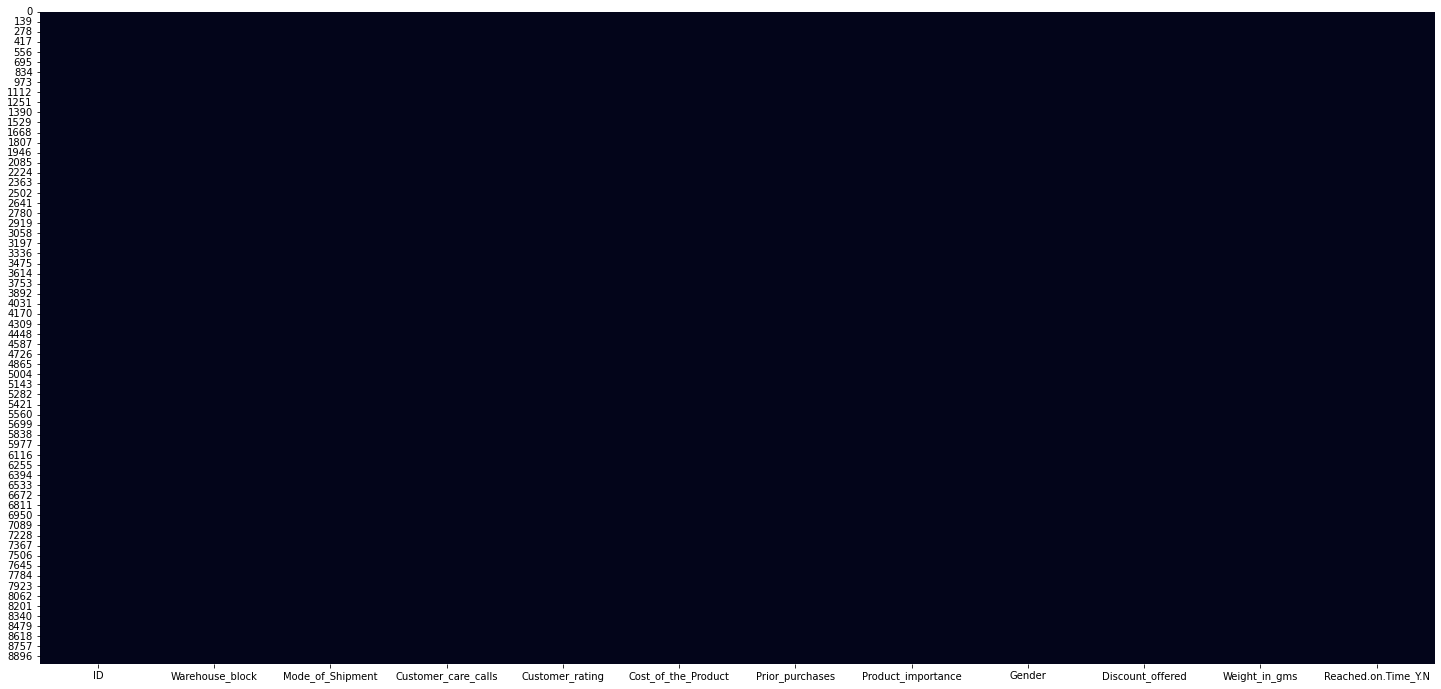

In [6]:
plt.figure(figsize= (25,12))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

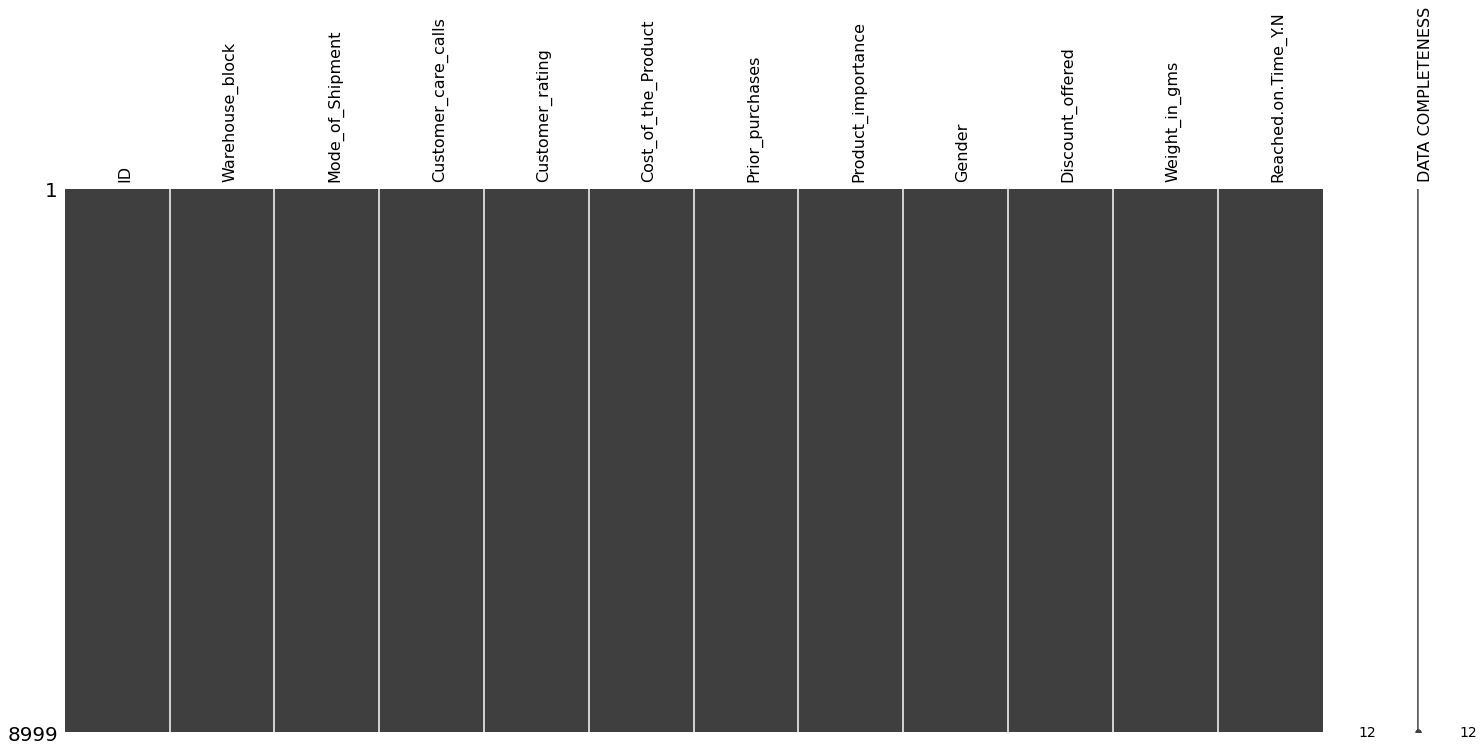

In [7]:
msno.matrix(data, labels = True, label_rotation = 90)
plt.show()

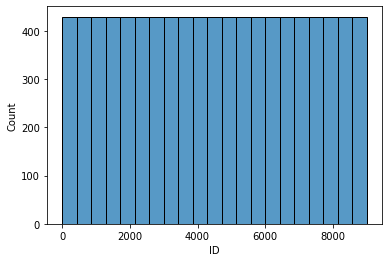

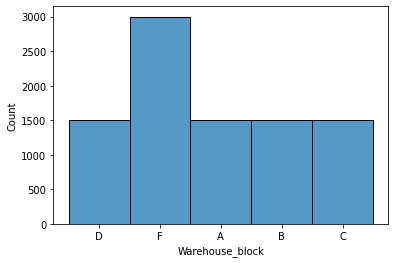

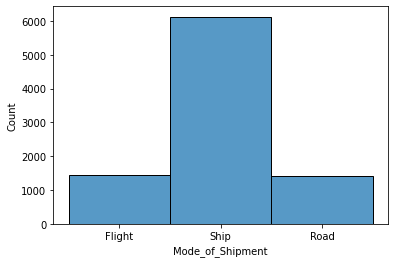

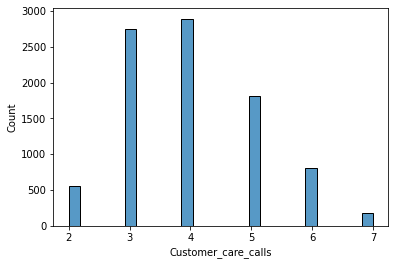

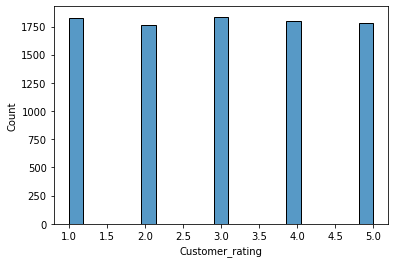

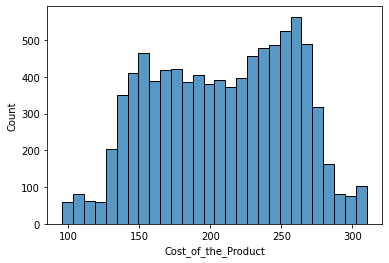

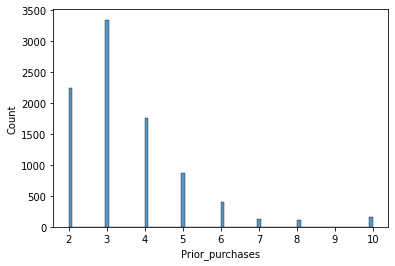

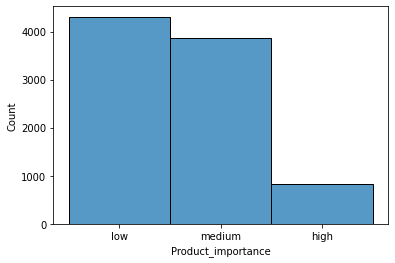

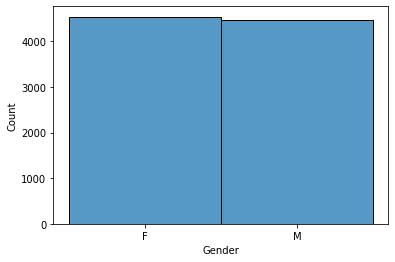

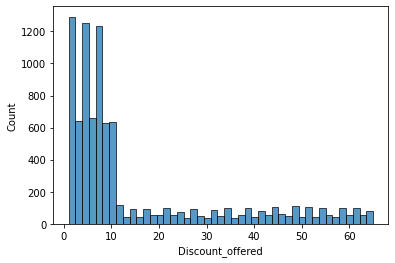

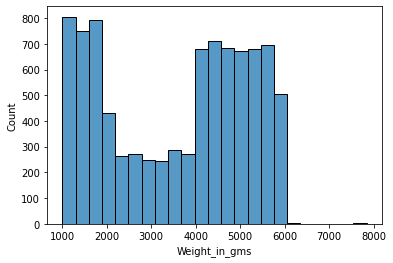

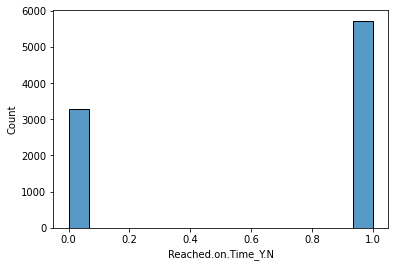

In [8]:
# Veamos cómo se distribuye la variable
for i in data.columns:
    sns.histplot(x = i, data= data, kde = False)
    plt.show()

In [9]:
data = pd.read_excel(r'E-Commerce_train.xlsx')
df0=data

In [10]:
df0['Warehouse_block']=df0['Warehouse_block'].map({'A':0,'B':1,'C':2,'D':3,'F':4})
df0['Mode_of_Shipment']=df0['Mode_of_Shipment'].map({'Flight':0,'Ship':1,'Road':2})
df0['Product_importance']=df0['Product_importance'].map({'low':0,'medium':1,'high':2})
df0=pd.get_dummies(df0,columns=['Gender'],drop_first=True)


In [11]:
df0.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Gender_M
0,1,3,0,4,2,177,3,0,44,1233,1,0
1,2,4,0,4,5,216,2,0,59,3088,1,1
2,3,0,0,2,2,183,4,0,48,3374,1,1
3,4,1,0,3,3,176,4,1,10,1177,1,1
4,5,2,0,2,2,184,3,1,46,2484,1,0


<AxesSubplot:>

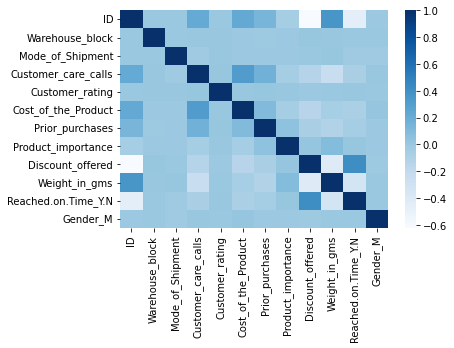

In [12]:
corr = df0.corr()
sns.heatmap(corr, cmap="Blues", annot=False)

In [13]:
df1=df0.drop(['Reached.on.Time_Y.N'],axis=1)
dfR=df0['Reached.on.Time_Y.N']

In [14]:
A=df1.corrwith(dfR)
A.sort_values(ascending=False)

Discount_offered       0.416357
Product_importance     0.014361
Customer_rating        0.011045
Warehouse_block        0.003055
Gender_M               0.002881
Mode_of_Shipment      -0.016414
Prior_purchases       -0.048269
Customer_care_calls   -0.072261
Cost_of_the_Product   -0.083470
Weight_in_gms         -0.326877
ID                    -0.457131
dtype: float64

In [15]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm


In [16]:
df0=df0.drop(columns='ID')

In [17]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [18]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df0)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [19]:
# Se convierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df0.columns
)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Gender_M
0,0.010075,-0.018801,-0.070604,0.000213,-0.163441,-0.053092,-0.020050,0.614495,-0.518640,0.563825,-0.011664
1,-0.009824,-0.040491,0.635890,0.033180,0.526695,0.376685,-0.145944,-0.064125,-0.382714,-0.020031,0.035011
2,-0.134221,-0.080036,-0.019327,0.225784,-0.096133,0.492823,0.795614,0.023905,0.025299,0.037322,-0.191062
3,-0.123366,-0.717309,-0.010333,-0.322068,-0.001666,-0.009719,0.143352,-0.012681,0.021847,0.026870,0.586861
4,-0.704059,0.098557,-0.002785,-0.607146,-0.006439,0.036894,-0.041275,0.002045,-0.037106,-0.027660,-0.347421
5,-0.658670,0.225945,-0.046116,0.541214,0.025306,-0.067494,-0.091032,-0.006151,0.007133,0.033707,0.453161
6,0.187042,0.643096,-0.002530,-0.425669,0.019208,0.136295,0.261178,0.032884,-0.010497,0.011121,0.530818
7,0.030341,-0.031972,-0.189952,-0.003958,-0.467537,0.706775,-0.464976,-0.046747,-0.061549,-0.114664,0.092271
8,0.023166,-0.024119,-0.542079,-0.022879,0.641649,0.276304,-0.133027,0.042904,0.276737,0.345313,-0.033004
9,-0.002124,0.033386,0.301858,-0.029949,-0.230731,0.010024,-0.046223,-0.494352,0.248364,0.738333,-0.013691


----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.16293466 0.13941263 0.09477936 0.09267822 0.09133745 0.09047869
 0.08859983 0.08024335 0.06402672 0.05500052 0.04050857]


Text(0, 0.5, 'Por. varianza explicada')

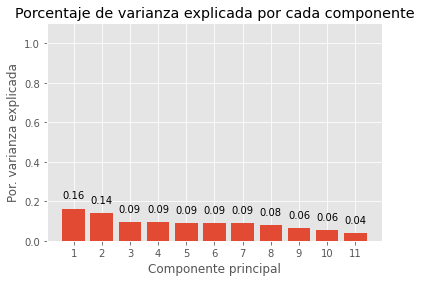

In [20]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df0.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.16293466 0.3023473  0.39712666 0.48980487 0.58114232 0.67162101
 0.76022084 0.84046419 0.90449091 0.95949143 1.        ]


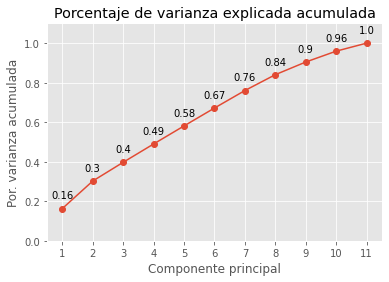

In [21]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(df0.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df0.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');